# Solution - Problem Set 1

## Preparation

In [1]:
# You will need the shared Google drive https://drive.google.com/drive/u/1/folders/0ALmMMRrzz_-5Uk9PVA
from google.colab import drive
drive.mount("/content/drive",force_remount=True)
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-F22/Data/data602.py ./datashim
from datashim import data602

Mounted at /content/drive


In [2]:
#load the citation and weather datasets
cdf = data602.read_citations()
wdf = data602.read_weather()

## Question 1 -- Data Exploration

### Part A
Over the entire dataset, which observations had the hottest and coldest temperatures?  What were those temperatures?

In [3]:
wdf.head()

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0


In [4]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67203 entries, 0 to 67202
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype                           
---  ------            --------------  -----                           
 0   date              67203 non-null  datetime64[us, America/New_York]
 1   wnd_speed         67190 non-null  float64                         
 2   tmp_meas          67201 non-null  float64                         
 3   precip            67093 non-null  float64                         
 4   precip_intensity  67203 non-null  int64                           
 5   cloudcover        67167 non-null  float64                         
 6   tstorm            67203 non-null  int64                           
 7   winter            67203 non-null  int64                           
 8   mist              67203 non-null  int64                           
 9   fog               67203 non-null  int64                           
dtypes: datetime64[us, Amer

In [5]:
wdf.describe()

,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
count,67190.000000,67201.000000,67093.000000,67203.000000,67167.000000,67203.000000,67203.000000,67203.000000,67203.000000
mean,2.972002,14.548230,0.136028,0.097109,2.533670,0.005402,0.008824,0.089579,0.006339
std,2.297396,10.071505,1.043389,0.348893,1.288491,0.073297,0.093522,0.285580,0.079366
min,0.000000,-16.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000,6.700000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.600000,15.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,4.100000,22.800000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,19.000000,37.800000,78.700000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
wdf.shape

(67203, 10)

In [7]:
hot_tmp =wdf.loc[wdf['tmp_meas'].idxmax()]
cold_tmp =wdf.loc[wdf['tmp_meas'].idxmin()]
print(f"Hottest temperatures :{hot_tmp['tmp_meas']}'C on {hot_tmp['date']} ")
print(f"Coldest temperatures :{cold_tmp['tmp_meas']}'C on {cold_tmp['date']}")

Hottest temperatures :37.8'C on 2020-07-20 16:54:00-04:00 
Coldest temperatures :-16.1'C on 2018-01-07 04:54:00-05:00



### Part B
In 2022, what month had the hottest average temperature?  The coldest?

In [8]:

wdf_1 = wdf[wdf['date'].dt.year == 2022]  # Filter for 2022

# Grouping  by month and calculating the average temperature
monthly_avg_tmp = wdf_1.groupby(wdf_1['date'].dt.month)['tmp_meas'].mean()

# Getting the  hottest and coldest months
hottest_month_2022 = monthly_avg_tmp.idxmax()
coldest_month_2022 = monthly_avg_tmp.idxmin()

# Mapping month number to month name
month_names = {i: month for i, month in enumerate([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
], start=1)}

print(f"Hottest month in 2022:  {month_names[hottest_month_2022]} with an average temperature {monthly_avg_tmp[hottest_month_2022]:.2f}'C")
print(f"Coldest month in 2022: {month_names[coldest_month_2022]} with average temperature {monthly_avg_tmp[coldest_month_2022]:.2f}'C")


Hottest month in 2022:  July with an average temperature 26.68'C
Coldest month in 2022: January with average temperature 0.17'C



### Part C
In 2022, how many days were associated with rain (i.e., liquid precipitation exceeding zero for at least one observation)?


In [9]:
rainy_days_2022 = wdf_1[wdf_1['precip'] > 0]['date'].dt.date.nunique()
print(f"Total number of rainy days in 2022: {rainy_days_2022} days")

Total number of rainy days in 2022: 120 days


## Question 2 -- Identifying 'interesting' patterns

Frawley, et al., define a pattern as 'interesting' if it is "novel, useful, and non-trivial to compute."  Explore either the weather or citations dataset to identify an interesting pattern.  Describe the pattern and why it is novel, useful, and non-trivial.

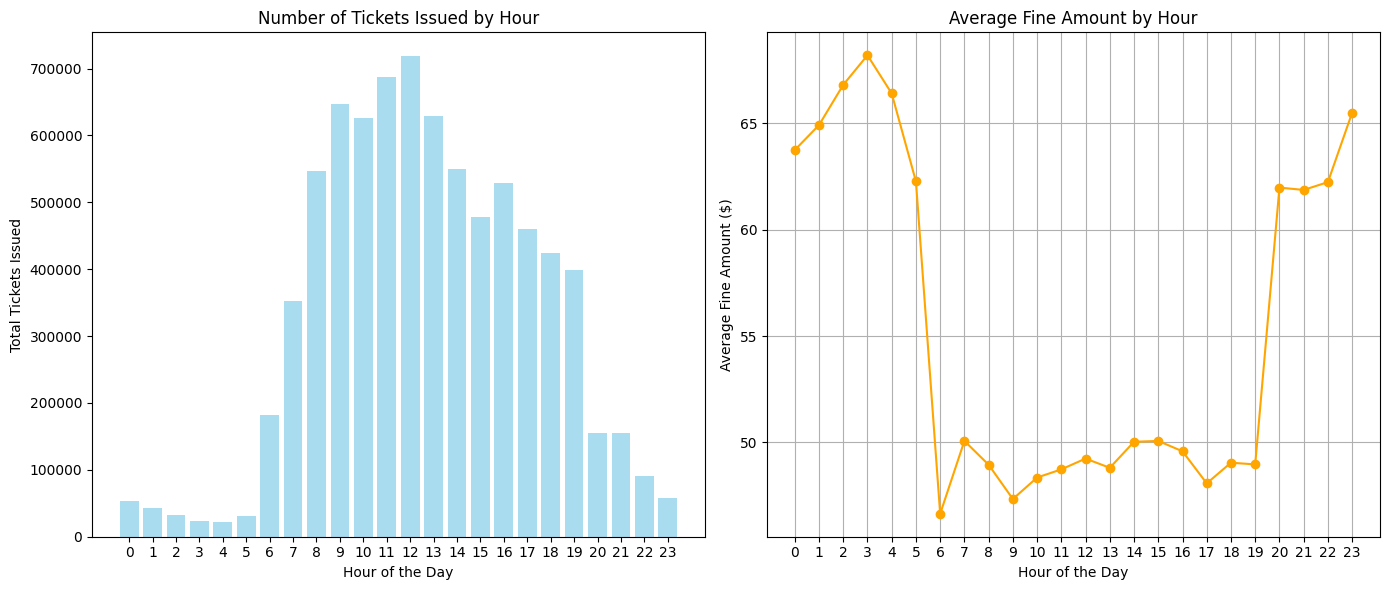

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

cdf['violdate'] = pd.to_datetime(cdf['violdate'])
cdf['violation_hour'] = cdf['violdate'].dt.hour

# Grouping the data by the hour to calculate the following:
# 1. Total number of tickets issued during each hour
# 2. The average fine amount issued during each hour
hourly_trends = cdf.groupby('violation_hour').agg(
    total_tickets=('citation', 'count'),
    average_fine=('violfine', 'mean')
).reset_index()

# Setting up a figure for 2 side-by-side plots
plt.figure(figsize=(14, 6))

# First plot: Total number of tickets issued at each hour
plt.subplot(1, 2, 1)
plt.bar(hourly_trends['violation_hour'], hourly_trends['total_tickets'], color='skyblue', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Tickets Issued')
plt.title('Number of Tickets Issued by Hour')
plt.xticks(range(0, 24))

# Second plot: Average fine issued at each hour
plt.subplot(1, 2, 2)
plt.plot(hourly_trends['violation_hour'], hourly_trends['average_fine'], marker='o', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fine Amount ($)')
plt.title('Average Fine Amount by Hour')
plt.xticks(range(0, 24))
plt.grid(True)

# Adjusting layout and showing the plots
plt.tight_layout()
plt.show()

**Pattern Identified:**
Total Tickets Issued (Left Plot):

The issuance of tickets is at its peak between midday (8 AM to 7 PM) and fewer in late night (12 AM to 5 AM).


**Average Fine Issued (Right Plot):**

The mean value of fine is greatest in late-night (12 AM to 4 AM) and evening (8 PM to 11 PM) times and least in its peak in issuance at midday.

**Why This Pattern is Interesting:**

***Novelty:***

The reverse relation between the total issuance of tickets and mean values of fines at times is counterintuitive and fascinating:

Higher mean values at nighttime imply concentrated issuance for extreme transgressions (e.g., restricted-area parking prohibited).
Higher issuance values with smaller values at midday imply less severe, high-frequent transgressions (e.g., meter expirations).

***Usefulness:***

*Optimization of Policy:*




The city planners and police can utilize this pattern in planning for issuance maximization.
Properly allocate resources through specific times for specific types of severity in transgressions.

*Public Awareness:*
Informing drivers about high-transgression times for extreme transgressions can discourage transgressions at late night and its penalty.

*Analysis for Enforcement:*
The pattern can indicate whether values in fine imply a reflection of a change in policies or an issuance bias.

***Non-Triviality:***

The analysis and balancing of two contrasting values took place to create this pattern:
Frequency of tickets in bulk (counted in hourly aggregates).
Value of fine (calculated mean in hourly aggregates).
The contrasting trends between these two values reveal the complexity of issuance behavior and fine policies.

***Broader Implications:***

*Strategic Enforcement:* Higher values for nighttime times could imply stricter issuance for extreme transgressions when fewer patrols are out.

*Daytime Relaxation:* Smaller values for daytime peak times imply transgressions such as meter expirations, less fined but with high frequencies.

***Conclusion:***
The pattern is new, useful, and non-trivial in complying with the following requirements:

Reveals an inverse, counterintuitive relation between volumes and fine severity.
Offers actionable information for optimizing policy and resources.
Requires balancing and comparing two contrasting values over a period

## Question 3 -- Machine Learning, Safety, and Fairness

Choose one of the examples of unfairness in machine learning discussed in class (or choose your own example), and answer the following questions.  

a. Mehrabi et al. define fairness in machine learning as "absence of any prejudice or favoritism toward an individual or group based on their inherent or acquired characteristics".  Using this definition, how did the application of the machine learning approach result in an unfair outcome?

b. What practices, if any, mitigated the impact of the algorithm's unfairness?

c. What lessons can be learned from this example?


# **Machine Learning, Safety, and Fairness: Wrongful Arrest Due to Facial Recognition Bias**

**(a) How Did the ML Approach Result in an Unfair Outcome?**

***Bias in Training Data:***

Like any machine learning model, facial recognition systems also have errors and show higher error rates for Black individuals because of misrepresentative datasets.

***False Positive Matches:*** Although this may seem counterintuitive, these machines have been proven to falsely identify black men majority of the time.

***Over-Reliance on AI:*** Algorithmic matches should be confirmed by the local government officers rather than just relying on technology.

***Lack of Transparency:*** One of the main issues with existing proprietary AI models, such as the one used in this case, is that they do not inform users how to look into them, which is problematic when it comes to contesting errors.

**(b) Practices to Mitigate Algorithmic Unfairness**

***Banning/Limiting Use:*** For instance, some cities in the US prohibit facial recognition for law enforcement purposes.

***Diverse Datasets:***  Introducing a variety of people in massive labeled datasets completely avoids data bias from the dataset created from different places.

***Mandatory Human Review:*** It can be solved to have a mandatory human review if these auxiliary pieces of evidence are offered to law enforcement with respect to these perpetrators.

***AI Audits:*** Inspections are done regularly. The process is also to show the review of the AI model to be transparent.

***Regulations:*** A well-established legal framework for artificial intelligence and other promising technology is a must to ensure fairness and accountability in the deployment of the developed technology.

**(c) Lessons Learned**

AI bias such as the one that is experienced in the real world with the case of wrongful arrests has a pronounced influence on the lives of people.

As the use of AI becomes the norm, it should not be the sole determining factor in deciding matters that may or may not affect people's lives.

The things that lead to the development of AI-based models have to be made clear to the people who have it to manage.

Improving the diversity of data sets can help, but it is not sufficient in and of itself—there are also systemic problems.